In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Stroke.csv')

# Data Processing

In [3]:
df["gender"] = df["gender"].map({'Female':0, 'Male':1})

In [4]:
def age_map(x):
    if x<25:
        age = 0
    elif 25<=x<44:
        age = 1
    elif 44<=x<60:
        age = 2
    else:
        age = 3
    return age
df["age"] = df["age"].map(age_map)

In [5]:
df["ever_married"] = df["ever_married"].map({'No':0, 'Yes':1})

In [6]:
df["work_type"] = df["work_type"].map({'Govt_job':0, 'Never_worked':1, 'Private':2, 'Self-employed':3, 'children':4})

In [7]:
df["residence_type"] = df["residence_type"].map({'Rural':0, 'Urban':1})

In [8]:
def glucose(x):
    if x<77.0675:
        age = 0
    elif 77.0675<=x<91.6800:
        age = 1
    elif 91.6800<=x<113.495000:
        age = 2
    else:
        age = 3
    return age
df["avg_glucose_level"] = df["avg_glucose_level"].map(glucose)

In [9]:
def bmi(x):
    if x<23.50:
        age = 0
    elif 23.50<=x<28.10:
        age = 1
    elif 28.10<=x<33.10:
        age = 2
    else:
        age = 3
    return age
df["bmi"] = df["bmi"].map(bmi)

In [10]:
df["smoking_status"] = df["smoking_status"].map({'Unknown':0, 'formerly smoked':1, 'never smoked':2, 'smokes':3})

# OLAP Slice

In [11]:
(df[(df["stroke"] == 0) & (df["age"] == 0)])

,Unnamed: 0,id,age,bmi,gender,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,avg_glucose_level,stroke
209,209,30669,0,0,1,0,0,0,4,0,0,2,0
211,211,16523,0,0,0,0,0,0,2,1,0,2,0
213,213,46136,0,0,1,0,0,0,1,0,0,3,0
225,225,19584,0,0,0,0,0,0,2,1,3,1,0
242,242,33759,0,0,0,0,0,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,4894,28048,0,1,1,0,0,0,4,1,0,1,0
4895,4895,68598,0,0,1,0,0,0,4,0,0,1,0
4898,4898,579,0,0,1,0,0,0,4,1,0,0,0
4902,4902,22127,0,3,0,0,0,0,2,1,0,1,0


In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

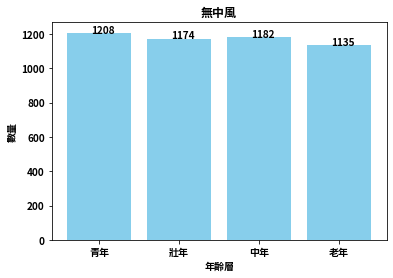

In [13]:
Grading = ['青年', '壯年', '中年', '老年']
unit = [len((df[(df["stroke"] == 0) & (df["age"] == 0)])), 
        len((df[(df["stroke"] == 0) & (df["age"] == 1)])), 
        len((df[(df["stroke"] == 0) & (df["age"] == 2)])), 
        len((df[(df["stroke"] == 0) & (df["age"] == 3)]))]
x = np.arange(len(Grading))
plt.xticks(x, Grading)
plt.bar(x, unit, color='skyblue')
for i, v in enumerate(unit):
    plt.text(i-.1, v, str(v))
plt.xlabel('年齡層')
plt.ylabel('數量')
plt.title('無中風')
plt.show()

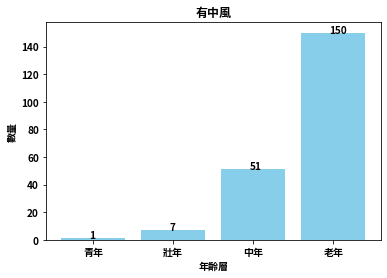

In [14]:
Grading = ['青年', '壯年', '中年', '老年']
unit = [len((df[(df["stroke"] == 1) & (df["age"] == 0)])), 
        len((df[(df["stroke"] == 1) & (df["age"] == 1)])), 
        len((df[(df["stroke"] == 1) & (df["age"] == 2)])), 
        len((df[(df["stroke"] == 1) & (df["age"] == 3)]))]
x = np.arange(len(Grading))
plt.xticks(x, Grading)
plt.bar(x, unit, color='skyblue')
for i, v in enumerate(unit):
    plt.text(i-.05, v, str(v))
plt.xlabel('年齡層')
plt.ylabel('數量')
plt.title('有中風')
plt.show()

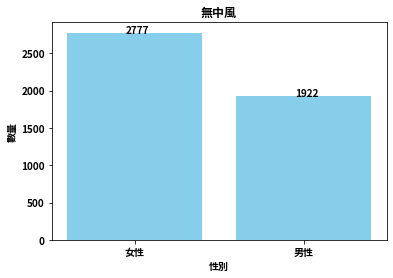

In [15]:
X = ['女性', '男性']
Y = [len((df[(df["stroke"] == 0) & (df["gender"] == 0)])), 
     len((df[(df["stroke"] == 0) & (df["gender"] == 1)]))]

plt.xticks(np.arange(len(X)), X)
plt.bar(np.arange(len(X)), Y, color='skyblue')

for i, v in enumerate(Y):
    plt.text(i-.05, v, str(v))

plt.xlabel('性別')
plt.ylabel('數量')
plt.title('無中風')
plt.show()

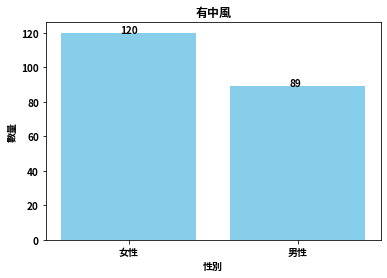

In [16]:
X = ['女性', '男性']
Y = [len((df[(df["stroke"] == 1) & (df["gender"] == 0)])), 
     len((df[(df["stroke"] == 1) & (df["gender"] == 1)]))]

plt.xticks(np.arange(len(X)), X)
plt.bar(np.arange(len(X)), Y, color='skyblue')

for i, v in enumerate(Y):
    plt.text(i-.05, v, str(v))

plt.xlabel('性別')
plt.ylabel('數量')
plt.title('有中風')
plt.show()

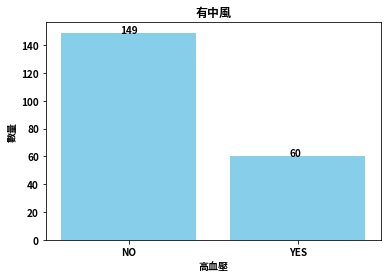

In [17]:
X = ['NO', 'YES']
Y = [len((df[(df["stroke"] == 1) & (df["hypertension"] == 0)])), 
     len((df[(df["stroke"] == 1) & (df["hypertension"] == 1)]))]

plt.xticks(np.arange(len(X)), X)
plt.bar(np.arange(len(X)), Y, color='skyblue')

for i, v in enumerate(Y):
    plt.text(i-.05, v, str(v))

plt.xlabel('高血壓')
plt.ylabel('數量')
plt.title('有中風')
plt.show()

In [18]:
df[(df["stroke"] == 1) & (df["hypertension"] == 0)]

,Unnamed: 0,id,age,bmi,gender,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,avg_glucose_level,stroke
0,0,9046,3,3,1,0,1,1,2,1,1,3,1
1,1,31112,3,2,1,0,1,1,2,0,2,2,1
2,2,60182,2,3,0,0,0,1,2,1,3,3,1
4,4,56669,3,2,1,0,0,1,2,1,1,3,1
6,6,10434,3,0,0,0,0,0,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,45535,3,3,1,0,0,1,2,0,2,3,1
205,205,17739,2,3,1,0,0,1,2,0,0,1,1
206,206,49669,0,2,0,0,0,0,4,0,0,0,1
207,207,27153,3,2,0,0,0,1,3,0,1,1,1


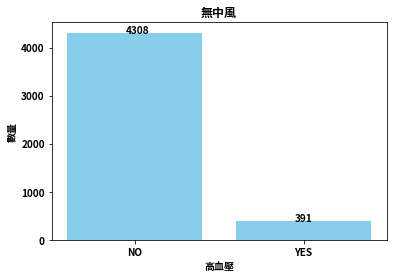

In [19]:
X = ['NO', 'YES']
Y = [len((df[(df["stroke"] == 0) & (df["hypertension"] == 0)])), 
     len((df[(df["stroke"] == 0) & (df["hypertension"] == 1)]))]

plt.xticks(np.arange(len(X)), X)
plt.bar(np.arange(len(X)), Y, color='skyblue')

for i, v in enumerate(Y):
    plt.text(i-.05, v, str(v))

plt.xlabel('高血壓')
plt.ylabel('數量')
plt.title('無中風')
plt.show()

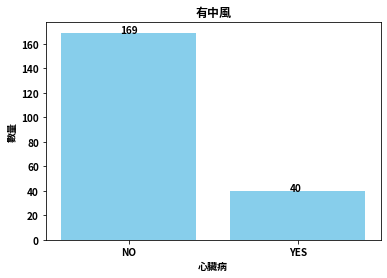

In [20]:
X = ['NO', 'YES']
Y = [len((df[(df["stroke"] == 1) & (df["heart_disease"] == 0)])), 
     len((df[(df["stroke"] == 1) & (df["heart_disease"] == 1)]))]

plt.xticks(np.arange(len(X)), X)
plt.bar(np.arange(len(X)), Y, color='skyblue')

for i, v in enumerate(Y):
    plt.text(i-.05, v, str(v))

plt.xlabel('心臟病')
plt.ylabel('數量')
plt.title('有中風')
plt.show()

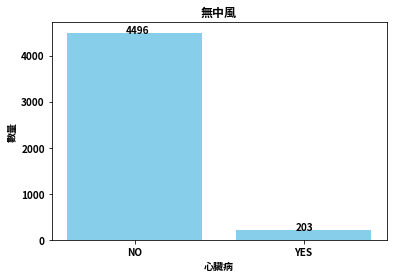

In [21]:
X = ['NO', 'YES']
Y = [len((df[(df["stroke"] == 0) & (df["heart_disease"] == 0)])), 
     len((df[(df["stroke"] == 0) & (df["heart_disease"] == 1)]))]

plt.xticks(np.arange(len(X)), X)
plt.bar(np.arange(len(X)), Y, color='skyblue')

for i, v in enumerate(Y):
    plt.text(i-.05, v, str(v))

plt.xlabel('心臟病')
plt.ylabel('數量')
plt.title('無中風')
plt.show()

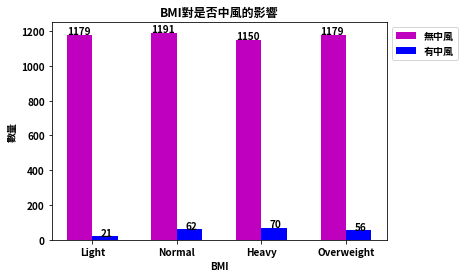

In [22]:
X = ['Light', 'Normal', 'Heavy', 'Overweight']
Y1 = [len((df[(df["stroke"] == 0) & (df["bmi"] == 0)])), 
      len((df[(df["stroke"] == 0) & (df["bmi"] == 1)])), 
      len((df[(df["stroke"] == 0) & (df["bmi"] == 2)])), 
      len((df[(df["stroke"] == 0) & (df["bmi"] == 3)]))]
Y2 = [len((df[(df["stroke"] == 1) & (df["bmi"] == 0)])), 
      len((df[(df["stroke"] == 1) & (df["bmi"] == 1)])), 
      len((df[(df["stroke"] == 1) & (df["bmi"] == 2)])), 
      len((df[(df["stroke"] == 1) & (df["bmi"] == 3)]))]

x = np.arange(len(X))
width = 0.3
plt.bar(x, Y1, width, color='m', label='無中風')
plt.bar(x + width, Y2, width, color='b', label='有中風')

for i, v in enumerate(Y1):
    plt.text(i-.15, v*1.005, str(v))
for i, v in enumerate(Y2):
    plt.text(i+.25, v*1.005, str(v))

plt.xticks(x + width / 2, X)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.xlabel('BMI')
plt.ylabel('數量')
plt.title('BMI對是否中風的影響')
plt.show()

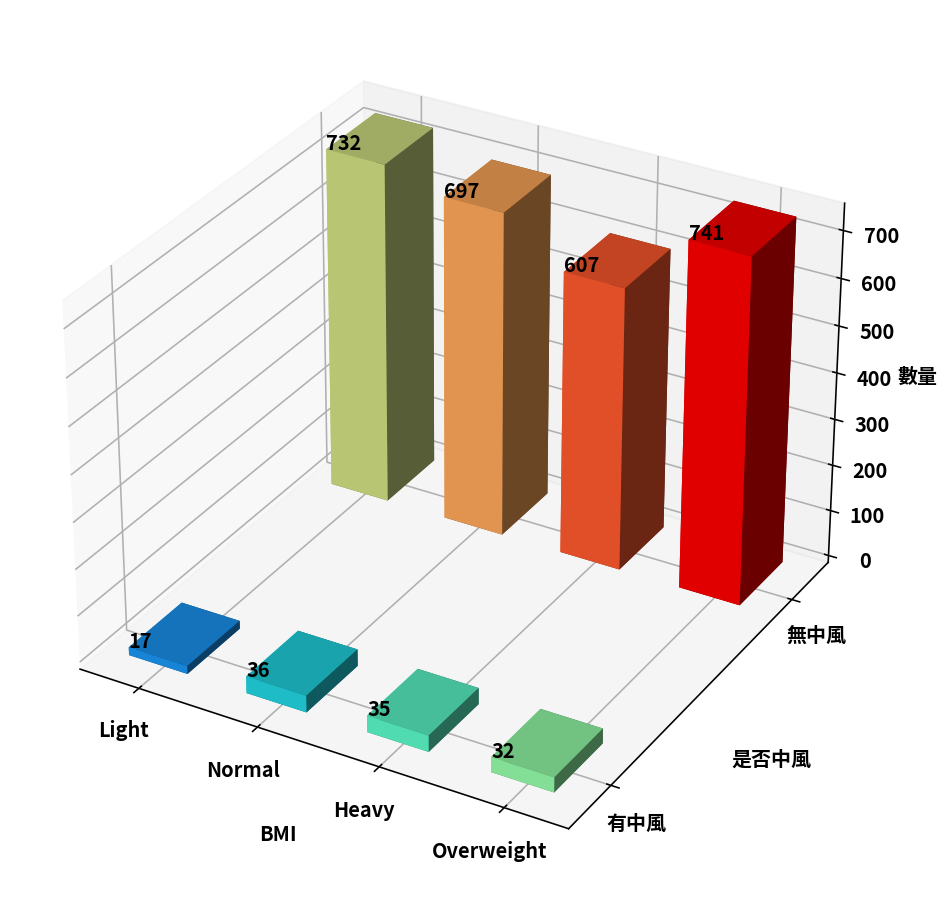

In [23]:
import numpy as np
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

result=[[len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["bmi"] == 0)])), 
         len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["bmi"] == 1)])), 
         len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["bmi"] == 2)])), 
         len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["bmi"] == 3)])),],
        [len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["bmi"] == 0)])), 
         len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["bmi"] == 1)])), 
         len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["bmi"] == 2)])), 
         len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["bmi"] == 3)])),]]

result = np.array(result, dtype=np.int32)
colors = ['r','b','g','y','p']
fig=plt.figure(figsize=(10, 8), dpi=144)
ax1=fig.add_subplot(111, projection='3d')

ax1.set_xlabel('BMI', labelpad=10)
ax1.set_ylabel('是否中風', labelpad=10)
ax1.set_zlabel('數量')

xlabels = np.array(['Light', 'Normal', 'Heavy','Overweight'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['有中風','無中風'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos = result
zpos = zpos.ravel()

dx=0.5
dy=0.25
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)
values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, shade=True, color=colors)
for i in range(len(xposM.ravel())):
    ax1.text(xposM.ravel()[i], yposM.ravel()[i], dz[i], str(dz[i]))
plt.show()

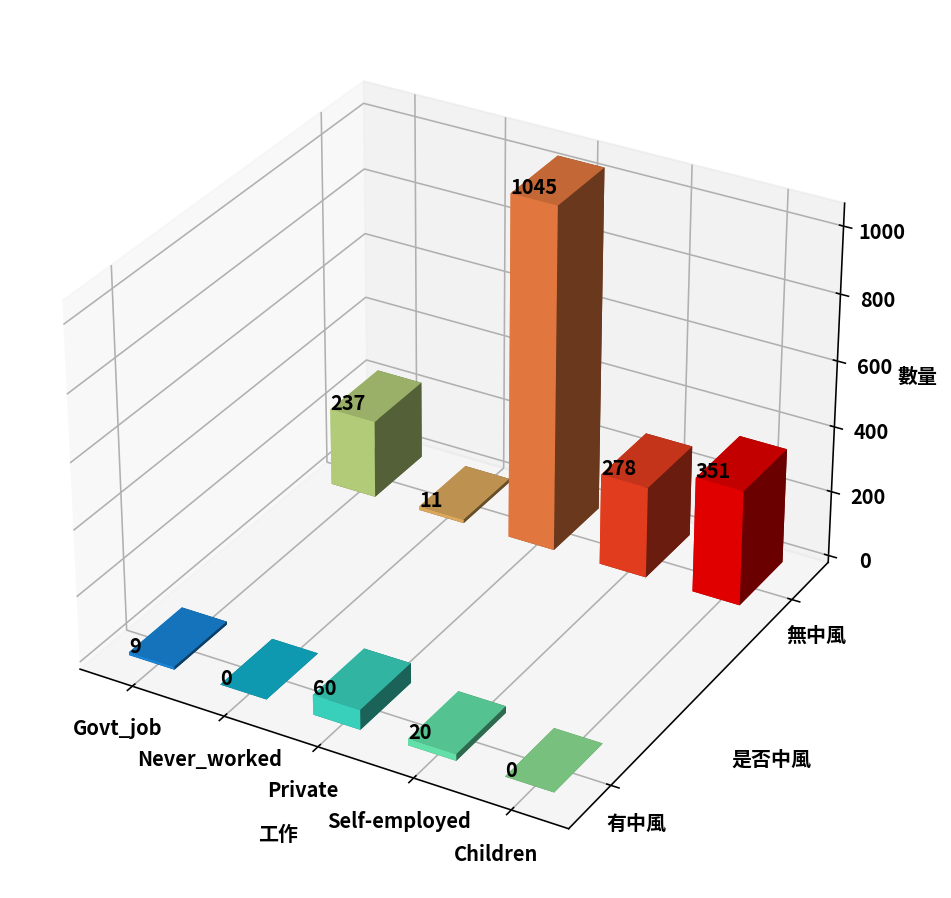

In [24]:
result=[[len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["work_type"] == 0)])), 
         len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["work_type"] == 1)])), 
         len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["work_type"] == 2)])), 
         len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["work_type"] == 3)])), 
         len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["work_type"] == 4)])),],
        [len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["work_type"] == 0)])), 
         len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["work_type"] == 1)])), 
         len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["work_type"] == 2)])), 
         len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["work_type"] == 3)])), 
         len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["work_type"] == 4)])),]]

result = np.array(result, dtype=np.int32)
colors = ['r','b','g','y','p']
fig=plt.figure(figsize=(10, 8), dpi=144)
ax1=fig.add_subplot(111, projection='3d')

ax1.set_xlabel('工作', labelpad=10)
ax1.set_ylabel('是否中風', labelpad=10)
ax1.set_zlabel('數量')

xlabels = np.array(['Govt_job', 'Never_worked', 'Private','Self-employed','Children'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['有中風','無中風'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos = result
zpos = zpos.ravel()

dx=0.5
dy=0.25
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)
values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, shade=True, color=colors)
for i in range(len(xposM.ravel())):
    ax1.text(xposM.ravel()[i], yposM.ravel()[i], dz[i], str(dz[i]))
plt.show()

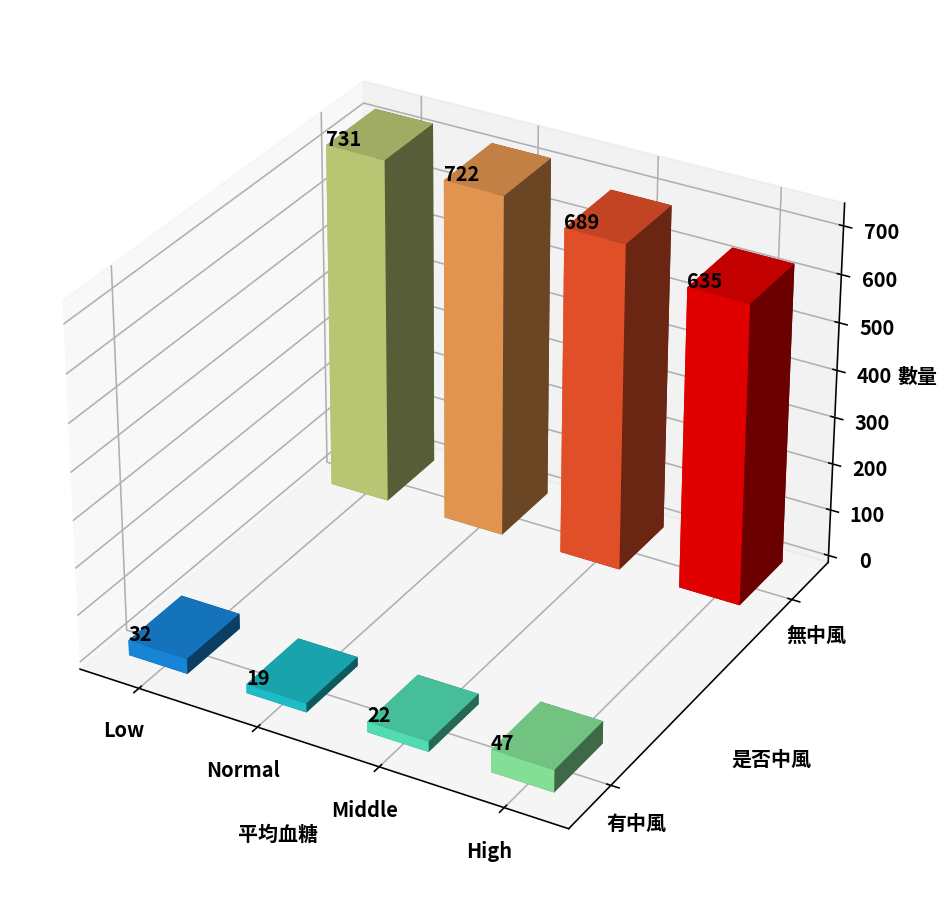

In [25]:
result=[[len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["avg_glucose_level"] == 0)])), 
         len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["avg_glucose_level"] == 1)])), 
         len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["avg_glucose_level"] == 2)])), 
         len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["avg_glucose_level"] == 3)]))],
        [len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["avg_glucose_level"] == 0)])), 
         len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["avg_glucose_level"] == 1)])), 
         len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["avg_glucose_level"] == 2)])), 
         len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["avg_glucose_level"] == 3)]))]]

result = np.array(result, dtype=np.int32)
colors = ['r','b','g','y','p']
fig=plt.figure(figsize=(10, 8), dpi=144)
ax1=fig.add_subplot(111, projection='3d')

ax1.set_xlabel('平均血糖', labelpad=10)
ax1.set_ylabel('是否中風', labelpad=10)
ax1.set_zlabel('數量')

xlabels = np.array(['Low', 'Normal', 'Middle','High'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['有中風','無中風'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos = result
zpos = zpos.ravel()

dx=0.5
dy=0.25
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)
values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, shade=True, color=colors)
for i in range(len(xposM.ravel())):
    ax1.text(xposM.ravel()[i], yposM.ravel()[i], dz[i], str(dz[i]))
plt.show()

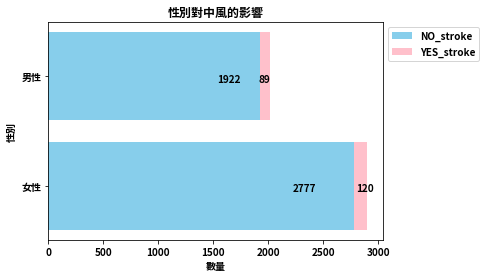

In [26]:
X = ['女性', '男性']
Y1 = [len((df[(df["stroke"] == 0) & (df["gender"] == 0)])), 
      len((df[(df["stroke"] == 0) & (df["gender"] == 1)]))]
Y2 = [len((df[(df["stroke"] == 1) & (df["gender"] == 0)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 1)]))]
x = np.arange(len(X))
plt.barh(x, Y1, color='skyblue', label='NO_stroke')
plt.barh(x, Y2, color='pink', label='YES_stroke', left = Y1)
plt.yticks(x, X)
plt.ylabel('性別')
plt.xlabel('數量')
plt.title('性別對中風的影響')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
for i in range(len(Y1)):
    plt.text(Y1[i]*0.8, i-.05 , str(Y1[i]), color="black")
    plt.text(Y1[i]+Y2[i]-100, i-.05 , str(Y2[i]), color="black")
plt.show()

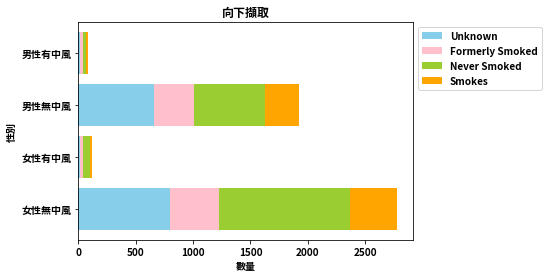

In [27]:
X = ['女性無中風', '女性有中風', '男性無中風', '男性有中風']
Y1 = [len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["smoking_status"] == 0)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["smoking_status"] == 0)])),
      len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["smoking_status"] == 0)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["smoking_status"] == 0)]))]
Y2 = [len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["smoking_status"] == 1)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["smoking_status"] == 1)])),
      len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["smoking_status"] == 1)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["smoking_status"] == 1)]))]
Y3 = [len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["smoking_status"] == 2)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["smoking_status"] == 2)])),
      len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["smoking_status"] == 2)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["smoking_status"] == 2)]))]
Y4 = [len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["smoking_status"] == 3)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["smoking_status"] == 3)])),
      len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["smoking_status"] == 3)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["smoking_status"] == 3)]))]

x = np.arange(len(X))
plt.barh(x, Y1, color='skyblue', label='Unknown')
plt.barh(x, Y2, color='pink', label='Formerly Smoked', left = Y1)
plt.barh(x, Y3, color='yellowgreen', label='Never Smoked', left = np.add(Y1, Y2))
plt.barh(x, Y4, color='orange', label='Smokes', left = np.add(np.add(Y1, Y2), Y3))
plt.yticks(x, X)
plt.ylabel('性別')
plt.xlabel('數量')
plt.title('向下擷取')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

plt.show()

In [28]:
print(Y1, Y2)

[796, 15, 658, 14] [430, 28, 349, 29]


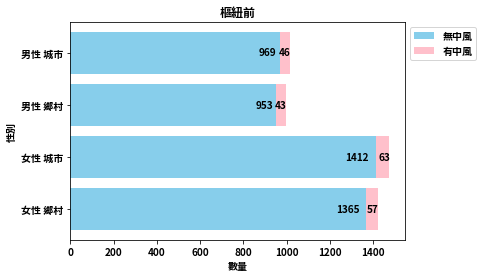

In [29]:
X = ['女性 鄉村', '女性 城市', '男性 鄉村', '男性 城市']
Y1 = [len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["residence_type"] == 0)])), 
      len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["residence_type"] == 1)])),
      len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["residence_type"] == 0)])), 
      len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["residence_type"] == 1)]))]
Y2 = [len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["residence_type"] == 0)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["residence_type"] == 1)])),
      len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["residence_type"] == 0)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["residence_type"] == 1)]))]

x = np.arange(len(X))
plt.barh(x, Y1, color='skyblue', label='無中風')
plt.barh(x, Y2, color='pink', label='有中風', left = Y1)
plt.yticks(x, X)
plt.ylabel('性別')
plt.xlabel('數量')
plt.title('樞紐前')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
for i in range(len(Y1)):
    plt.text(Y1[i]*0.9, i-.05 , str(Y1[i]))
    plt.text(Y1[i]+Y2[i]-50, i-.05 , str(Y2[i]))

plt.show()

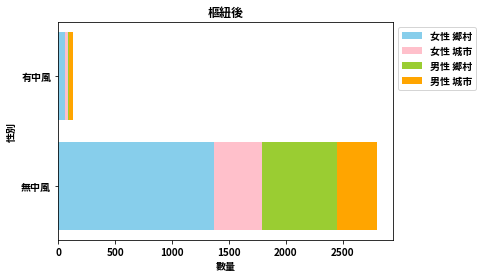

In [30]:
X = ['無中風', '有中風']
Y1 = [len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["residence_type"] == 0)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["residence_type"] == 0)]))]
Y2 = [len((df[(df["stroke"] == 0) & (df["gender"] == 0) & (df["smoking_status"] == 1)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 0) & (df["smoking_status"] == 1)])),]
Y3 = [len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["smoking_status"] == 0)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["smoking_status"] == 0)])),]
Y4 = [len((df[(df["stroke"] == 0) & (df["gender"] == 1) & (df["smoking_status"] == 1)])), 
      len((df[(df["stroke"] == 1) & (df["gender"] == 1) & (df["smoking_status"] == 1)])),]

x = np.arange(len(X))
plt.barh(x, Y1, color='skyblue', label='女性 鄉村')
plt.barh(x, Y2, color='pink', label='女性 城市', left = Y1)
plt.barh(x, Y3, color='yellowgreen', label='男性 鄉村', left = np.add(Y1, Y2))
plt.barh(x, Y4, color='orange', label='男性 城市', left = np.add(np.add(Y1, Y2), Y3))
plt.yticks(x, X)
plt.ylabel('性別')
plt.xlabel('數量')
plt.title('樞紐後')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

plt.show()